# 공공데이터 상권정보 분석해 보기 

* https://www.data.go.kr/data/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다. 
* 처음으로 파일데이터에서 **상가(상권)정보_의료기관_201909** 를 다운받아 봅니다. 

## 필요한 라이브러리 불러오기 

In [5]:
import pandas as pd 
import numpy as np 

# 시각화를 위한 시본 모듈 
import seaborn as sns 

## 시각화를 위한 폰트 설정 

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.rc('font',family = 'Malgun Gothic') # 윈도우의 한글 폰트 설정 

# 애플의 경우 , 
#plt.rc('font', family='AppleGothic')

# minus 폰트 깨짐 방지 
plt.rc('axes', unicode_minus=False)


## 데이터 로드하기 
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다. 
* 데이터를 로드해서 df라는 변수에 할당합니다. 
* 그리고 shape을 통해 데이터의 갯수를 확인합니다. : 결과는 (행,열) 순으로 출력됩니다. 

In [8]:
# read_csv로 불러온 파일을 df라는 변수에 담습니다. 
df = pd.read_csv("data\/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv",low_memory= False)

In [9]:
# 데이터 크기 확인 
df.shape

(91335, 39)

## 데이터 미리보기 
* head와 tail을 통해 데이터를 미리 볼 수 있습니다. 

In [6]:
# head로 데이터를 미리보기 합니다. 
#shift + tab 키를 누르시면 docstring (함수에 대한 공식 문서)을 볼 수 있습니다. 
df.head()
# 5 개 열이 기본 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1,NaN,127.095522,37.323528


In [10]:
# 뒤의 자료만 확인합니다. 

df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


## 데이터 요약하기 
 

### 데이터 요약정보 

In [11]:
# info로 데이터의 요약을 봅니다. 
df.info()

# 데이터의 행 갯수가 다른 이유는 결측치가 있기 때문 
# 다 찬것들은 91335ro dlTdma 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 컬럼명 보기 

In [12]:
# 컬럼명만 출력해 보니다. 
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 데이터 타입

In [13]:
# 데이터 타입만 출력합니다. 
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 결측치

In [14]:
# 결측치가 있는 위치 확인하기 
df.isnull()

# true 로 표현된다면 결측치가 있는것! 

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
3,False,False,True,False,False,False,False,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91330,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
91331,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
91332,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
91333,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False


In [15]:
# 파이썬에서 True는 1과 같은 특성을 지닌다 
# 이러한 특성을 이용하여 결측치가 몇개나 있는지 확인 가능하다. 

df.isnull().sum()

# 결과로서 각 열에 몇개의 결측치가 있는지 확인이 가능하다! 

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [16]:
# 결측치의 갯수를 변수에 담아 사용할것이다. 
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<AxesSubplot:>

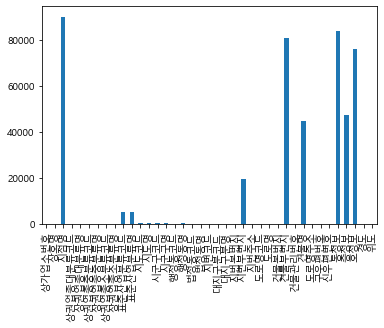

In [14]:
# 위해서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 
# 이를 통해 각 행의 결측치의 숫자를 보다 직관적으로 눈으로 확인 가능합니다. 

null_count.plot.bar()

# .plot. + tab을 누르면 판다스에서 그릴수 있는 그래프의 유형들이 나옵니다. 
# .plot 을 누르면 기본 선 그래프로 나온다. 



<AxesSubplot:>

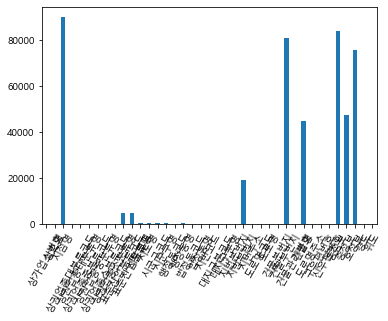

In [17]:
# 밑의 레이블의 각도를 바꿔주는 옵션 : "rot = "   (rotation)
null_count.plot.bar(rot = 60)

<AxesSubplot:>

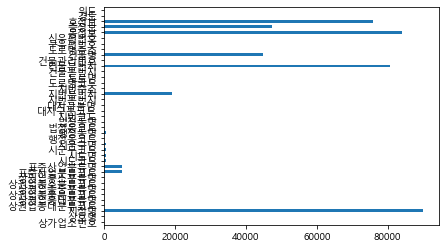

In [18]:
# 글씨를 매끄럽게 보기 힘들다. 
# 이럴때는 xy축을 바꿔보는게 좋을 수도 있다. 
## 방법은 bar() 가 아닌 barh()를 이용하는것! 
null_count.plot.barh()

<AxesSubplot:>

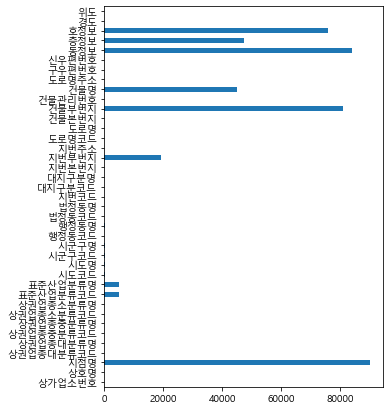

In [19]:
# 그림의 사이즈를 조정하여 레이블의 크기를 보기 쉽게 만들어줍니다. 

null_count.plot.barh(figsize = (5,7))

In [20]:
# 위에서 계산한 결측치 수를 reset_index를 통해 데이터프레임으로 만들어 줍니다. 
# df_null_count 변수에 결과값을 담아서 head로 미리보기를 합니다. 
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


## 컬럼명 변경하기 

In [21]:
# df_null_count 변수에 담겨있는 컬럼의 이름을 "컬럼명", "결측치 수" 로 변경해줍니다. 

df_null_count.columns = ["컬럼명", "결측치 수"]
df_null_count

,컬럼명,결측치 수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


## 정렬하기 

In [22]:
# df_null_count 데이터프레임에 있는 결측치 수 컬럼을 sort_valus 를 통해 정렬해서 
# 결측치가 많은 순으로 상위 10개만 출력합니다. 

df_null_count_top = df_null_count.sort_values(by = '결측치 수', ascending= False).head(10)

## 특정 컬럼만 불러오기 

In [23]:
# '지점명' 컬럼만 불러옵니다. 
df["지점명"]
# NAN : Not A number의 준말 --> 결측치 


0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [24]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담습니다. 
drop_columns = df_null_count_top["컬럼명"].to_list() #.to_list() 는 리스트 자료형으로 변환해주는 함수 
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [25]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다. 
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


## 제거하기 

In [26]:
# 위의 자료 확인결과, drop_columns의 상위값들에 해당하는 인덱스들은 너무 많은 결측치를 지님 
# 따라서 해당 자료들을 삭제 
print(df.shape) # 제거하기 전의 자료 모습
df = df.drop(drop_columns,axis = 1) # 컬럼을 기준으로 삭제할것 --> axis =1 
                               # drop_columns 변수에 담긴 열들 (결측치를 갖는 열들)을 삭제할것이다. 
print(df.shape) # 제거 이후의 자료의 모양 

# 총 10개의 열이 날아감을 보여줌 


(91335, 39)
(91335, 29)


In [27]:
# 제거 결과를 info로 확인합니다. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 기초 통계값 보기 

 ### 기초 통계 수치 

In [28]:
# 평균값 구하기. 
df.dtypes # 기초 통계값은 int나 float에 대해서만 구할 수 있음. 따라서 데이터의 타입을 알아보는것이 적절하다. 
df["위도"].mean()

36.62471119236673

In [29]:
# 중앙값 
df.median()

상가업소번호    2.211900e+07
시군구코드     4.111700e+04
행정동코드     4.111758e+09
법정동코드     4.111710e+09
지번코드      4.111711e+18
대지구분코드    1.000000e+00
지번본번지     4.620000e+02
도로명코드     4.111743e+11
건물본번지     9.200000e+01
건물관리번호    4.113110e+24
구우편번호     4.403000e+05
신우편번호     2.435300e+04
경도        1.270846e+02
위도        3.723465e+01
dtype: float64

In [30]:
# 최댓값 
df["위도"].max()

38.499658570559795

In [31]:
# 최솟값
df["위도"].min()

33.2192896688307

In [32]:
# 갯수
df["위도"].count()

91335

### 기초통계값 요약하기 
describe를 사용하면 데이터를 요약해 볼 수 있습니다. 기본적으로 수치형 데이터를 요약해서 보여줍니다. 데이터의 갯수,평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.

In [33]:
# 위도를 describe로 요약해 봅시다.
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [34]:
# 2개의 칼럼을 describe로 요약해 봅시다. 
df["위도","경도"]  # 에러 : 파이썬의 판다스에서는 두개이상의 데이터를 가져올때는 리스트 형태의 자료구조를 이용해야함!

KeyError: ('위도', '경도')

In [35]:
df[["위도","경도"]] # 와 같이 두개의 괄호를 사용할것! 
df[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [36]:
# describe로 문자열 데이터타입의 요약을 봅니다. 
df.describe(include = "number") # 기본적으로 수치형 데이터의 값들만 가져옴 
df.describe(include="object") # 문자형태로 되어있는 데이터 타입에 대한것만 분석

# top의 결과는 최빈값! 
# freqency는 최빈값의 빈도수를 보여줌 

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


### 중복을 제거한 값 보기 
* unique로 중복을 제거한 값을 보고 nunique로 갯수를 세어봅니다. 

In [37]:
# "상권업종대분류명"에서 중복을 제거한 값 보기 

df["상권업종대분류명"].unique()

# 모든 값들이 "의료"이다.

array(['의료'], dtype=object)

In [38]:
df["상권업종대분류명"].nunique()

1

In [39]:
# 상권업종 중분류명
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [40]:
df["상권업종중분류명"].nunique()

5

In [41]:
# "상권업종소분류명"
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [42]:
df["상권업종소분류명"].nunique()

34

In [43]:
# nunique 를 대신하여 len으로 확인할 수 있음 
len(df["상권업종소분류명"].unique())

34

### 그룹화된 요약값 보기 - value_counts 
* value_count 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다 

In [44]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다. 
#시도코드를 세어봅시다. 
df["시도명"]

0          경기도
1        서울특별시
2          경기도
3        부산광역시
4          경기도
         ...  
91330    대전광역시
91331      경기도
91332    부산광역시
91333    서울특별시
91334     충청남도
Name: 시도명, Length: 91335, dtype: object

In [45]:
# 시도명을 세어봅니다. 
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [46]:
city_normalize = df["시도명"].value_counts(normalize=True) 
city_normalize
#해당 옵션은 각각의 데이터가 전체 데이터에서 차지하는 비중을 나타낸다 

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

### 그래프를 통한 자료 확인 

#### pandas의 기본제공 plot함수 
* pandas는 기본적으로 plot함수를 내장한다. 
* pandas. tab을 눌러 기본적으로 제공하는 그래프 유형을 확인할 수 있다. 

<AxesSubplot:>

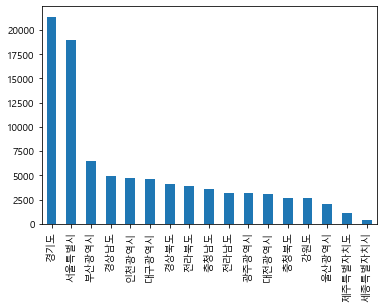

In [47]:
# pandas는 plot 기능을 내장하고 있다. 
# 위에서 분석한 시도면 수를 막대 그래프로 표현해 봅니다. 
city.plot.bar()

<AxesSubplot:ylabel='시도명'>

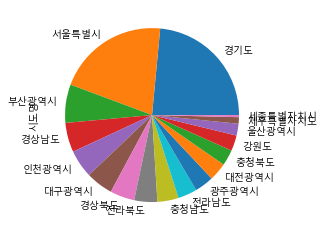

In [48]:
# 판다스의 plot.pie()를 사용하여 파이그래프를 그려봅니다. 

city.plot.pie()
# 파이차트는 수치적 모호함이 있어 주로 쓰진 않는다. 
# 특히 시본은 이러한 모호함때문에 추가적 파이차트 개발을 하지 않는다고 밝힘 


#### seaborn을 이용해 그래프 그려보기 
* seaborn의 장점 : 고급통계 기능을 그래프 내부에서 제공한다.  
* seaborn의 단점 : 데이터의 크기가 클수록 속도가 느리다 

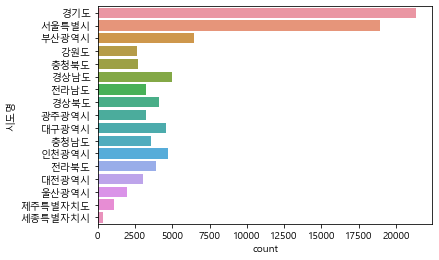

In [49]:
# seaborn의 countplot으로 그려봅니다. 
c = sns.countplot(data =df, y ="시도명")
# count변수를 미리 구하지 않고 입력해도 빈도수를 구해 자동으로 그래프를 그려준다. 

#seaborn은 기본적으로 x,y,data를  입력해야하지만, countplot은 x,y 중 하나만 넣어도 된다. 

#### 연습! 

In [50]:
## 한번더 연습! ## 
# "상권업종대분류명"의 갯수를 세어봅니다. 
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [51]:
# "상권업종 중 분류명" 으로 구해봅니다. 
c = df["상권업종중분류명"].value_counts()
c

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [52]:
# normaloze = True를 이용하여 비율을 구해봅니다. 
n =df["상권업종중분류명"].value_counts(normalize = True) # normalize 옵션은 해당값의 전체대비 비율을 보여준다. 
n

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<AxesSubplot:>

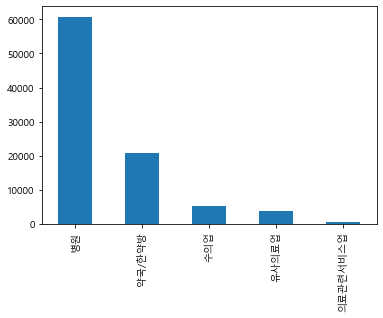

In [53]:
# 판다스의 plot.bar() 을 이용해 막대그래프를 그려봅니다. 
c.plot.bar()

<AxesSubplot:>

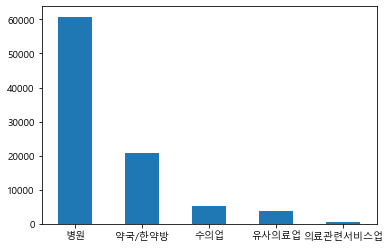

In [54]:
c.plot.bar(rot=0)

<AxesSubplot:ylabel='상권업종중분류명'>

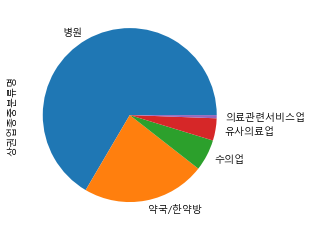

In [55]:
n.plot.pie()

In [56]:
# "상권업종 소 분류명"에 대한 그룹화된 값을 카운트 합니다. 
c = df["상권업종소분류명"].value_counts()
c

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
수의업-기타         9
접골원            9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<AxesSubplot:>

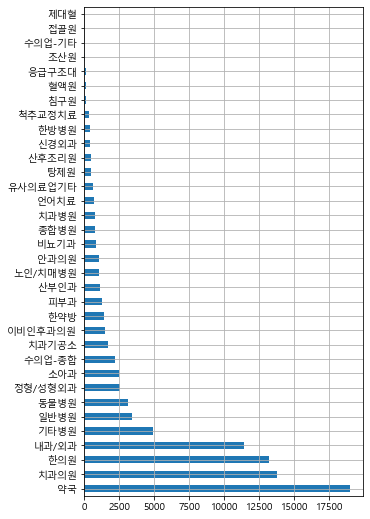

In [57]:
# 상권업종 소분류명으로 갯수를 세어줍니다. 
# pandas의 plot.bar()을 사용해 막대그래프를 그려봅니다. 

c.plot.barh(figsize =(5,9),grid = True) # grid 옵션을 이용하여 격자무늬 추가 

<AxesSubplot:xlabel='count', ylabel='상권업종소분류명'>

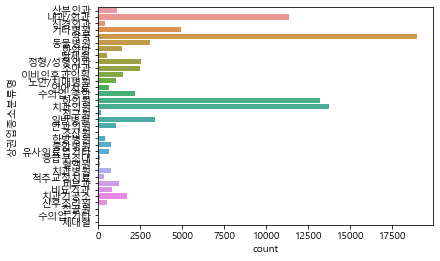

In [58]:
# seaborn의 countplot으로 그려봅니다. 
sns.countplot(y="상권업종소분류명",data = df)

## 데이터 색인하기 
* 특정 데이터만 모아서 따로 봅니다. 

In [59]:
# "상권업종중분류명"이 "약국/한약방"인 데이터만 가져와서 df_medical 이라는 변수에 담아봅니다. 
# 그리고 head()를 통래 미리보기를 합니다. 
df["상권업종중분류명"] == "약국/한약방"
# 해당결과는 boolean indexing 으로 나옴 

df[df["상권업종중분류명"] == "약국/한약방"]
# df[]안의 조건이 True인 값들만 담아준다. 즉, 분류명이 약국/한약방 인 정보들만 가져오게된다. 

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
4,20364049,더블유스토어수지점,S,의료,S02,약국/한약방,S02A01,약국,경기도,41465.0,...,경기도 용인시 수지구 풍덕천동 712-2,414653205024,경기도 용인시 수지구 문정로,32,4146510100107120002026238,경기도 용인시 수지구 문정로 32,448170.0,16837.0,127.095522,37.323528
6,20733252,춘산한약방,S,의료,S02,약국/한약방,S02A02,한약방,강원도,42110.0,...,강원도 춘천시 중앙로2가 99,421104454113,강원도 춘천시 낙원길,50,4211010500101000000023668,강원도 춘천시 낙원길 50,200042.0,24273.0,127.726905,37.880504
7,20582210,부부탕제원,S,의료,S02,약국/한약방,S02A03,탕제원,충청북도,43111.0,...,충청북도 청주시 상당구 금천동 187-17,431114508623,충청북도 청주시 상당구 중고개로337번길,134,4311112000101870017042942,충청북도 청주시 상당구 중고개로337번길 134,360802.0,28726.0,127.499206,36.625355
10,21057519,민생약국,S,의료,S02,약국/한약방,S02A01,약국,경상남도,48890.0,...,경상남도 합천군 용주면 월평리 78-2,488904844473,경상남도 합천군 용주면 월평길,149,4889046030200780002048274,경상남도 합천군 용주면 월평길 149-35,678912.0,50212.0,128.118615,35.575962
13,21217689,제중당한약방,S,의료,S02,약국/한약방,S02A02,한약방,전라남도,46830.0,...,전라남도 영암군 도포면 덕화리 296,468304685396,전라남도 영암군 도포면 인덕길,75,4683035023102960000000001,전라남도 영암군 도포면 인덕길 75-10,526832.0,58429.0,126.630348,34.834080


In [58]:
# "상권업종대분류명" 에서 "의료"만 가져옵니다. 
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다. 
# 이 기능을 통해 "상권업종중분류명"만 가져옵니다. 
# 그리고 가져온 결과를 value_counrs를 통해 중분류의 갯수를 세어봅니다. 

df[df["상권업종대분류명"] == "의료"]["상권업종중분류명"] # 이렇게 df[][] 형태로 호출하는것 보다는 loc를 이용하는것을 추천 

df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"] # 이렇게 df.loc[행,열] 방식을 추천 
df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts() 


병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [60]:
# 위와 같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()
m = df["상권업종대분류명"] == "의료"
df.loc[m, "상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [61]:
# 유사의료업만 따로 모아 봅니다. 
df["상권업종중분류명"] == "유사의료업"
df_medi = df[df["상권업종중분류명"]=="유사의료업"]
df_medi.shape 

(3774, 29)

In [62]:
# 상호명을 그룹화해서 갯수를 세어봅니다. 
# value_counts를 사용해서 상위 10개를 출력합니다. 

df["상호명"].value_counts()

df["상호명"].value_counts().head()
df["상호명"].value_counts().tail()

# method chaining : 위와 같이 어떤 결과값에 .메소드 를 붙여쓰는것을 의미한다.  



편착한의원      1
대구애락원      1
요셉치과의원     1
권영균치과의원    1
전영미산부인과    1
Name: 상호명, dtype: int64

In [63]:
# 유사의료업만 df_medi 변수에 담겨 있습니다. 
# df_medi에서 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 츨력해봅니다. 

df_medi["상호명"].value_counts().head()

리원         32
고려수지침      22
대한적십자사     17
헌혈의집       12
고려수지침학회    10
Name: 상호명, dtype: int64

### 여러조건으로 색인하기 

In [64]:
# "상권업종소분류명"이 약국" 인 것과 
# "시도명"이 "서울특별시"인 데이터 만 가져옵니다. 
df_seoul_drug = df[(df["상권업종소분류명"]=="약국") & (df["시도명"] == "서울특별시")]

print(df_seoul_drug.shape)
df_seoul_drug.head(1)
#판다스에는  and 는 &로, or은 |로  색인함 

## 꿀팁! ## 
# 주피터 노트북은 기본적으로 마지막 줄의 결과만 출력 
# 앞에 있는 결과도 출력하고 싶다면 print를 쓰면 된다. 

(3579, 29)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
33,20816709,이즈타워약,S,의료,S02,약국/한약방,S02A01,약국,서울특별시,11680.0,...,서울특별시 강남구 역삼동 821,116803122010,서울특별시 강남구 테헤란로,101,1168010100108210001000001,서울특별시 강남구 테헤란로 101,135080.0,6134.0,127.028023,37.498656


### 구별로 보기 

In [65]:
# 위에서 색인란 데이터로 "시군구명"으로 그룹화 해서 갯수를 세어봅니다. 
# 구별로 약국이 몇개가 있는지 확인해 봅니다. 
c = df_seoul_drug["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [66]:
# normalize = True를 통해 비율을 구합니다. 
n = df_seoul_drug["시군구명"].value_counts(normalize=True)
n.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<AxesSubplot:>

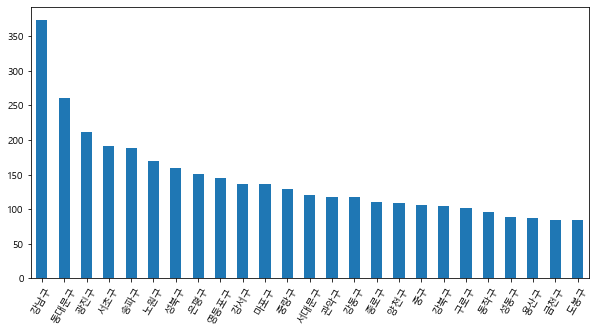

In [67]:
# 위에서 구한 결과를 판다스의 plot.bar()을 통해 막대그래프로 그립니다 
c.plot.bar(rot = 60, figsize = (10,5))

In [68]:
# "상권업종소분류명"이 "종합병원"인 것과 
# "시도명"이 "서울특별시"인 데이터만 가져옵니다. 
# 결과를 df_seoul_hospital에 할당해 재사용합니다. 

df_seoul_hospital = df[(df["상권업종소분류명"]=="종합병원") & (df["시도명"]=="서울특별시")].copy()

#df_seoul_hospital = df[(df["상권업종소분류명"]=="종합병원") & (df["시도명"]=="서울특별시")]
# 위와 같이 copy를 사용하지 않으면, df_seoul_hospital의 특정 값을 바꾸면 df도 같이 값이 변해버림 

df_seoul_hospital["상호명"].head(10)
df_seoul_hospital[["상권업종소분류명","시도명"]]

,상권업종소분류명,시도명
305,종합병원,서울특별시
353,종합병원,서울특별시
385,종합병원,서울특별시
1917,종합병원,서울특별시
2461,종합병원,서울특별시
...,...,...
71991,종합병원,서울특별시
76508,종합병원,서울특별시
90492,종합병원,서울특별시
90581,종합병원,서울특별시


In [69]:
# "시군구명" 으로 그룹화 해서 구별로 종합병원의 수를 세어봅니다. 

df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
서초구      6
광진구      6
중구       5
강동구      5
송파구      5
양천구      4
강북구      4
서대문구     4
도봉구      4
성북구      3
관악구      2
노원구      2
종로구      2
강서구      2
동대문구     2
성동구      2
중랑구      2
금천구      2
구로구      2
은평구      1
동작구      1
마포구      1
용산구      1
Name: 시군구명, dtype: int64

### 텍스트 데이터 색인하기 

In [73]:
# 색인하기 전에 상호명 중에 종합병원이 아닌 데이터를 찾아봅니다. 
df_seoul_hospital["상호명"].str.contains("종합병원")
df_seoul_hospital[~df_seoul_hospital["상호명"].str.contains("종합병원")]

# ~(물결)표시를 입력하면 뒤의 조건을 만족하지 않는! 것들만 가져온다 . 

df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원" ),"상호명"]  

df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원" ),"상호명"].unique()  
# 상호명들을 보고 전혀 종합병원같지 않은경우 조치가 필요하다. 

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [71]:
# 상호명에 툭정 단어가 들어가는 데이터를 불러옵니다 
# 종합병원 분류에 꽃배달 상호 들어가는 데이터는 좀;; 
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
2803,20895655,서울성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 551,116504163330,서울특별시 서초구 사평대로28길,55,1165010700105510000017194,서울특별시 서초구 사평대로28길 55,137040.0,6578.0,127.000682,37.498257
4644,22020310,강남성모병원장례식장꽃배달,S,의료,S01,병원,S01B01,종합병원,서울특별시,11650.0,...,서울특별시 서초구 반포동 547-6,116504163242,서울특별시 서초구 반포대로39길,56,1165010700105470006016762,서울특별시 서초구 반포대로39길 56-24,137040.0,6578.0,127.001756,37.499095


In [74]:
# 상호명에 툭정 단어가 들어가는 데이터를 불러옵니다 
# 종합병원 분류에 '의료기 매장' 상호 들어가는 데이터는 좀;;
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
1917,23210677,평화드림여의도성모병원의료기매장,S,의료,S01,병원,S01B01,종합병원,서울특별시,11560.0,...,서울특별시 영등포구 여의도동 62,115603118001,서울특별시 영등포구 63로,10,1156011000100620000031477,서울특별시 영등포구 63로 10,150713.0,7345.0,126.936693,37.518296


In [75]:
# "꽃배달 | 장례식장| 상담소| 어린이집" 은 종합병원과 무관해 보임 
# 전처리를 위해 해당 텍스트를 한번에 검색합니다. 
# 제거할 데이터의 인덱스만 drop_row 에 담아주고 list형태로 변환합니다. 
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|장례식장|상담소|어린이집")]

drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|장례식장|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row


[2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [76]:
# 의원으로 끝나는 데이터도 종합병원으로 볼 수 없음 
# 안덱스를 찾아 drop_row2 에 담아주고 list 형으로 반환해줌 
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

# endswith 는 contains와 같은역할 

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [77]:
# 삭제할 행을 drop row에 합쳐 줍니다.
drop_row = drop_row + drop_row2
len(drop_row)

32

In [78]:
# 해당 셀을 삭제하고 삭제 전후 행의 갯수 비교 
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row,axis=0) #행 기준 삭제 
print(df_seoul_hospital.shape)

(91, 29)
(59, 29)


<AxesSubplot:>

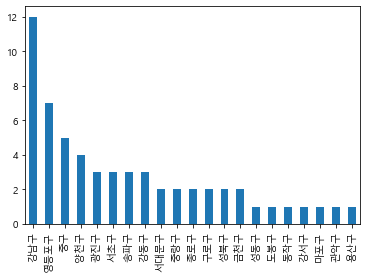

In [79]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그립니다. 
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<AxesSubplot:xlabel='시군구명', ylabel='count'>

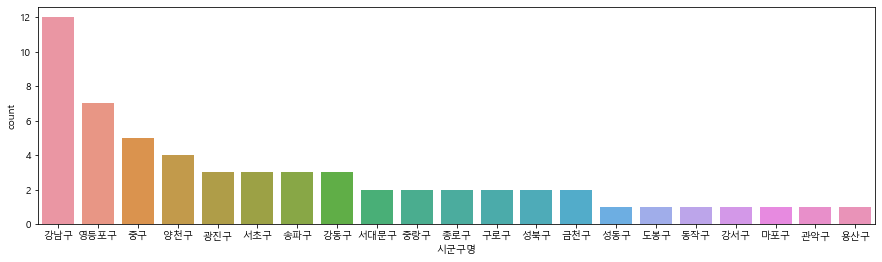

In [80]:
# 시군구명에 따라 종합병원의 숫자를 countplot으로 그립니다.
plt.figure(figsize=(15,4))
sns.countplot(data = df_seoul_hospital, x ="시군구명",order = df_seoul_hospital["시군구명"].value_counts().index)

### 특정 지역만 보기

In [81]:
# 서울에 있는 데이터의 위도와 경도를 봅니다. 
# 결과를 df_seoul 이라는 데이터프레임에 저장합니다. 
# 새로운 변수에 데이터프레임을 저장시 copy()를 사용합니다. 

df_seoul = df[df["시도명"]=="서울특별시"].copy()
df_seoul.shape


# df_seoul  = df.loc[df["시도명"] == "서울특별시" , ["위도","경도"]]

(18943, 29)

<AxesSubplot:>

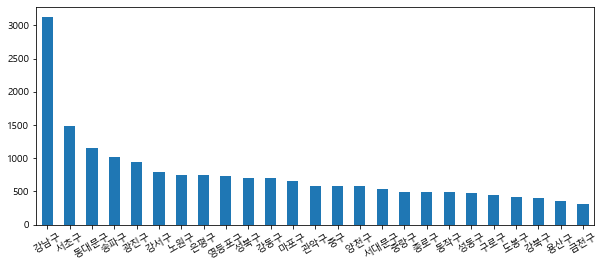

In [82]:
# seaborn의 countplot을 사용해서 위에서 만든 df_seoul 데이터프레임의 
# 시군구명을 시각화 합니다. 

df_seoul["시군구명"].value_counts().plot.bar(figsize = (10,4), rot = 30)


<AxesSubplot:xlabel='시군구명', ylabel='count'>

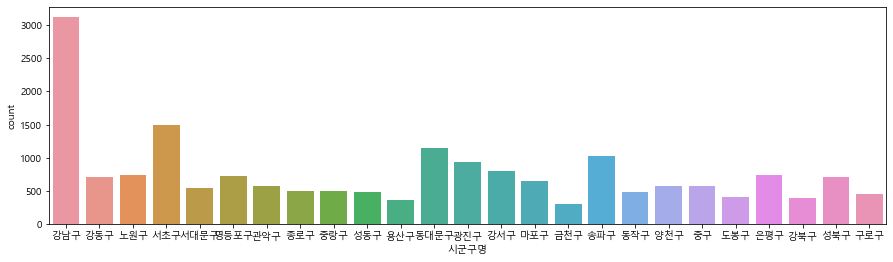

In [83]:
# seaborn의 countplot으로 그려봅시다,
plt.figure(figsize =(15,4))
sns.countplot(data = df_seoul,x = "시군구명") 


<AxesSubplot:xlabel='경도', ylabel='위도'>

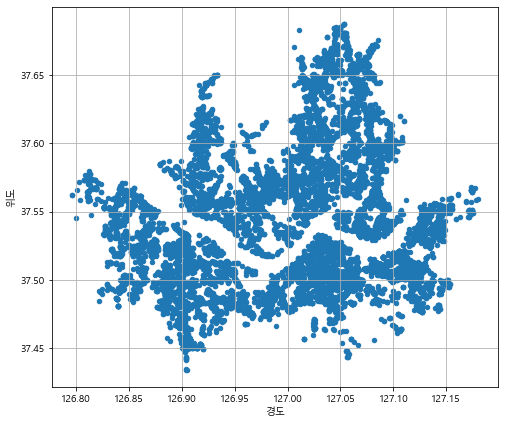

In [84]:
# pandas의 plot.scatter을 통해 경도와 위도를 표시해봅니다.
df_seoul[["경도","위도","시군구명"]].plot.scatter(x = "경도",y="위도",figsize = (8,7),grid = True)

<AxesSubplot:xlabel='경도', ylabel='위도'>

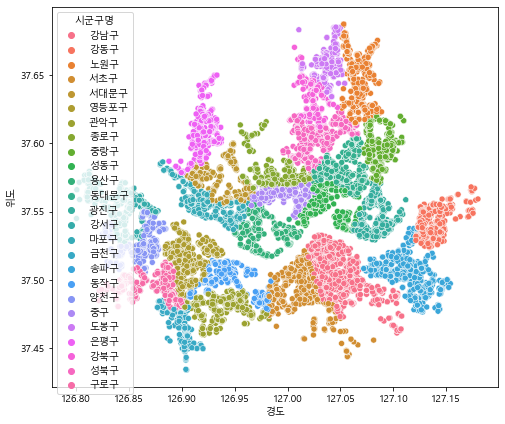

In [82]:
# seaborn의 scatterplot을 통해 구별 경도와 위도를 표시해봅니다. 
plt.figure(figsize=(8,7))
sns.scatterplot(data=df_seoul, x = "경도", y="위도",hue="시군구명") # hue옵션은 포토샵에 있는 색상설정기능을 의미함 
                                                                     # 시군구명에 따라 색상을 다르게 설정 

<AxesSubplot:xlabel='경도', ylabel='위도'>

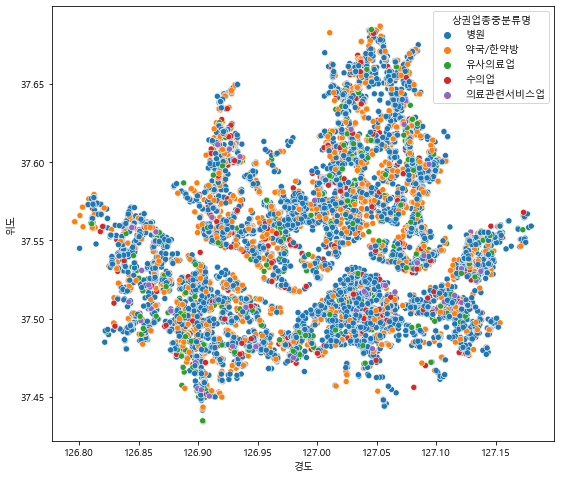

In [83]:
# seaborn의 scatterplot을 통해 "상권업종중분류명" 경도와 위도를 표시해봅니다. 
plt.figure(figsize =(9,8))
sns.scatterplot(data = df_seoul,x="경도",y = "위도", hue="상권업종중분류명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

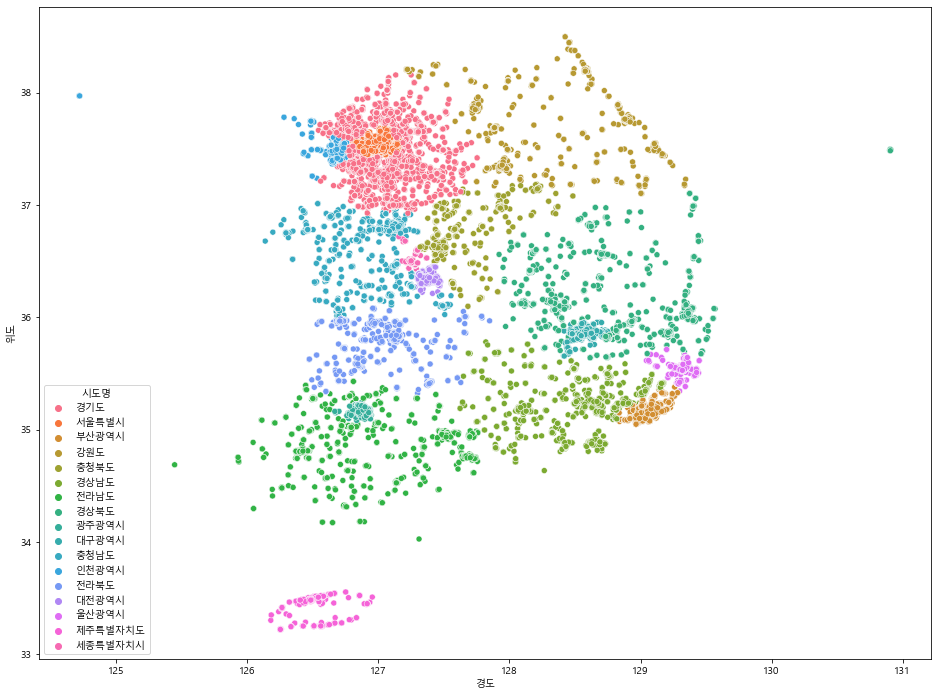

In [84]:
# seaborn의 scatterplot을 통해 전국데이터로 구별 경도와 위도를 표시ㅙ봅니다. 
plt.figure(figsize =(16,12))
sns.scatterplot(data = df,x="경도",y = "위도", hue="시도명") 


## Folium으로 지도 활용하기 
* 다음의 프롬프트 창(아나콘다 프롬프트)을 열어 conda 명령어로 설치합니다. 
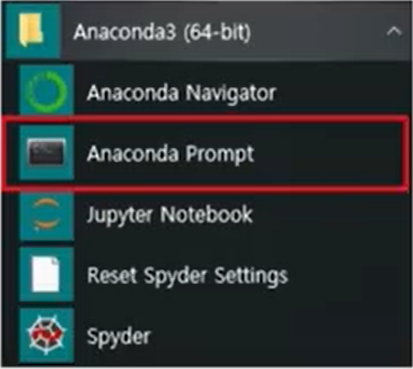  
검은색 프롬프트 창에 아래 명령어를 통해 Folium을 설치합니다. 

> conda install -c conda-forge folium

### Folium 사용예제 
* https://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb

In [85]:
# 아나콘다에서 folium을 사용하기 위해서는 별도의 설치가 필요 
# folium은 지도 시각화를 위한 라이브러리 
import folium

In [86]:
df_seoul_hospital["위도"].mean()
df_seoul_hospital["경도"].mean()

126.99534764098732

In [95]:
map = folium.Map()
map

# folium 의 Map method는 위치를 부여하지 않으면 우선적으로 세계지도 전체를 보여줌 

In [106]:
m = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], zoom_start=10)
m

# m.save("folium_test.html") # 결과를 디렉토리 내부에 저장 

# 위치는 location 파라미터를 [행(위도) ,열(경도)] 의 형태로 부여 
# zoom_start는 지정한 위치까지의 확대 정도를 할당해주는것 

In [107]:
df_seoul_hospital.head(1)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
305,25155642,대진의료재단,S,의료,S01,병원,S01B01,종합병원,서울특별시,11215.0,...,서울특별시 광진구 중곡동 58-25,112153104006,서울특별시 광진구 긴고랑로,119,1121510100100580025000733,서울특별시 광진구 긴고랑로 119,143220.0,4944.0,127.088279,37.559048


In [111]:
# 이제 위의 지도 위에 for문을 활용하여 위도와 경도를 표시하고, 마커를 설정할것이다

map = folium.Map(location=[df_seoul_hospital["위도"].mean(), df_seoul_hospital["경도"].mean()], zoom_start=10)


for n in df_seoul_hospital.index : 
    name = (df_seoul_hospital.loc[n,"상호명"])
    address = (df_seoul_hospital.loc[n,"도로명주소"])
    popup = f"{name}-{address}"
#     print(df_seoul_hospital.loc[n,"경도"])
#     print(df_seoul_hospital.loc[n,"위도"])
    location = [df_seoul_hospital.loc[n,"위도"],df_seoul_hospital.loc[n,"경도"]]
    folium.Marker(
        location = location,
        popup= popup,
    ).add_to(map)

map 

## 자율주제를 세우고 직접 분석해보기! 

* 해당 데이터를 응용하여 나만의 실습 예제를 구성해봅시다. 
* 상권업종중분류명, 상권업종중소분류명 중에 관심있는 분류명을 색인한 후에 시도별, 시군구별 분석을 진행해보세요! 

  * ex) 강남에는 피부과와 성형외과가 다른 지역세 비해 얼마나 많을까? 